# Horse Survival Prediction                         

#### @Author : Saurabh Kumar 

In [1]:
pwd

'E:\\DataScience\\MachineLearning\\Horse Survival Prediction'

In [2]:
path="E:\\DataScience\\MachineLearning\\Horse Survival Prediction"

In [3]:
import os
os.listdir(path)

['.git',
 '.ipynb_checkpoints',
 'archive.zip',
 'horse.csv',
 'Horse_Survival_Prediction.ipynb']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from wordcloud import WordCloud
from scipy import signal
import scipy
#to supress warning
import warnings
warnings.filterwarnings('ignore')


#to make shell more intractive
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')


In [5]:
df = pd.read_csv(path+"\\horse.csv")

In [6]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [7]:
df.tail()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes
298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,...,36.0,62.0,clear,1.0,euthanized,no,6112,0,0,no


In [8]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [9]:
df.shape

(299, 28)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [11]:
df.corr().style.background_gradient(cmap = 'Greys')

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
hospital_number,1.000000,0.144118,0.379607,0.273350,-0.005577,-0.093508,-0.228843,-0.044184,0.145397,-0.050433,-0.020950
rectal_temp,0.144118,1.000000,0.218868,0.268846,0.228306,0.065101,-0.060817,0.009343,0.062639,-0.062876,0.029336
pulse,0.379607,0.218868,1.000000,0.469368,0.005796,0.405660,-0.086533,0.020937,0.079332,-0.001899,0.101412
respiratory_rate,0.273350,0.268846,0.469368,1.000000,0.127164,0.086394,-0.090743,-0.074056,0.180250,-0.020601,0.144773
nasogastric_reflux_ph,-0.005577,0.228306,0.005796,0.127164,1.000000,-0.131044,-0.717363,0.539505,0.089207,nan,nan
packed_cell_volume,-0.093508,0.065101,0.405660,0.086394,-0.131044,1.000000,-0.053075,0.152736,-0.068743,-0.077727,-0.066180
total_protein,-0.228843,-0.060817,-0.086533,-0.090743,-0.717363,-0.053075,1.000000,-0.517338,-0.181468,0.223892,0.066856
abdomo_protein,-0.044184,0.009343,0.020937,-0.074056,0.539505,0.152736,-0.517338,1.000000,-0.032938,-0.153246,-0.104158
lesion_1,0.145397,0.062639,0.079332,0.180250,0.089207,-0.068743,-0.181468,-0.032938,1.000000,0.005966,0.005850
lesion_2,-0.050433,-0.062876,-0.001899,-0.020601,nan,-0.077727,0.223892,-0.153246,0.005966,1.000000,0.269374


In [12]:
df.describe().T.style.background_gradient(cmap = 'Greys')

,count,mean,std,min,25%,50%,75%,max
hospital_number,299.000000,1087732.702341,1532031.581823,518476.000000,528904.000000,530301.000000,534736.000000,5305629.000000
rectal_temp,239.000000,38.168619,0.733744,35.400000,37.800000,38.200000,38.500000,40.800000
pulse,275.000000,72.000000,28.646219,30.000000,48.000000,64.000000,88.000000,184.000000
respiratory_rate,241.000000,30.460581,17.666102,8.000000,18.000000,25.000000,36.000000,96.000000
nasogastric_reflux_ph,53.000000,4.707547,1.982311,1.000000,3.000000,5.000000,6.500000,7.500000
packed_cell_volume,270.000000,46.307407,10.436743,23.000000,38.000000,45.000000,52.000000,75.000000
total_protein,266.000000,24.274436,27.364194,3.300000,6.500000,7.500000,56.750000,89.000000
abdomo_protein,101.000000,3.039604,1.967947,0.100000,2.000000,2.300000,3.900000,10.100000
lesion_1,299.000000,3659.709030,5408.472421,0.000000,2111.500000,2322.000000,3209.000000,41110.000000
lesion_2,299.000000,90.528428,650.637139,0.000000,0.000000,0.000000,0.000000,7111.000000


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

<AxesSubplot:>

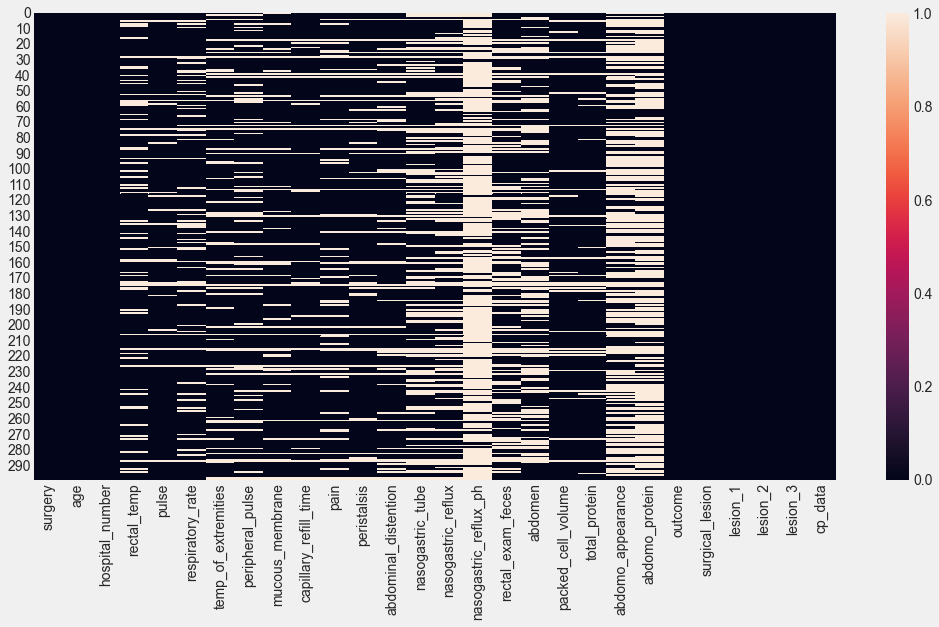

In [15]:
sns.heatmap(df.isnull())

In [16]:
#percentage of null each columns
for col in df.columns:
    print('{} :NUll %  :     {}'.format(col,df[col].isnull().sum()/df[col].count()))

surgery :NUll %  :     0.0
age :NUll %  :     0.0
hospital_number :NUll %  :     0.0
rectal_temp :NUll %  :     0.2510460251046025
pulse :NUll %  :     0.08727272727272728
respiratory_rate :NUll %  :     0.24066390041493776
temp_of_extremities :NUll %  :     0.23045267489711935
peripheral_pulse :NUll %  :     0.3
mucous_membrane :NUll %  :     0.1865079365079365
capillary_refill_time :NUll %  :     0.1198501872659176
pain :NUll %  :     0.22540983606557377
peristalsis :NUll %  :     0.17254901960784313
abdominal_distention :NUll %  :     0.23045267489711935
nasogastric_tube :NUll %  :     0.5333333333333333
nasogastric_reflux :NUll %  :     0.5492227979274611
nasogastric_reflux_ph :NUll %  :     4.6415094339622645
rectal_exam_feces :NUll %  :     0.5177664974619289
abdomen :NUll %  :     0.6519337016574586
packed_cell_volume :NUll %  :     0.10740740740740741
total_protein :NUll %  :     0.12406015037593984
abdomo_appearance :NUll %  :     1.2313432835820894
abdomo_protein :NUll %  :  

### Remove Null values

In [17]:
# No. of Animal Hospital Avaliable in the city from where data is taken...
df.hospital_number.nunique()

283

In [18]:
#Lets drop hospital_number since it not relivant 
df.drop(['hospital_number'],axis=1,inplace=True)

<AxesSubplot:xlabel='rectal_temp', ylabel='Density'>

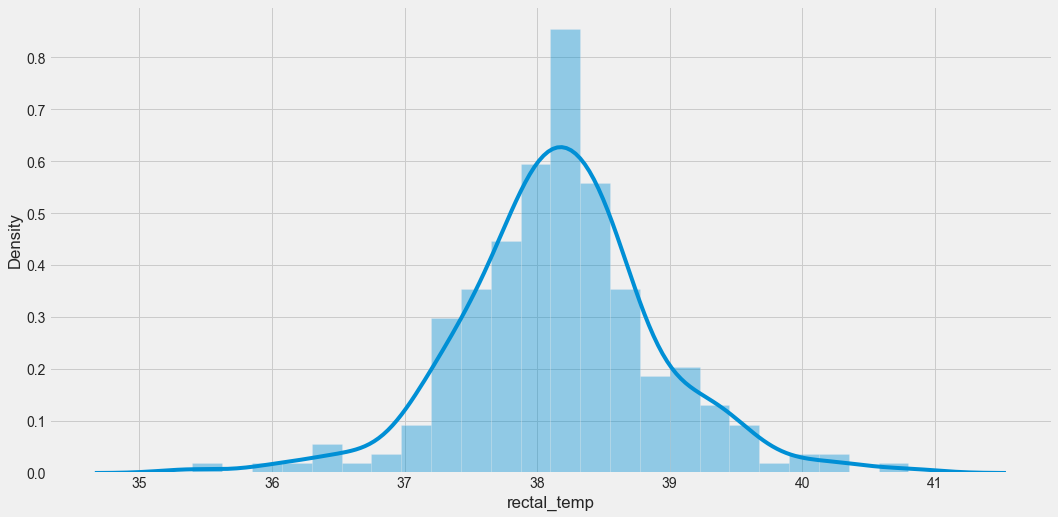

In [19]:
#center of tendency
sns.distplot(df['rectal_temp'])

In [20]:
#Central tendency of rectal_temp
df['rectal_temp'].describe()

count    239.000000
mean      38.168619
std        0.733744
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal_temp, dtype: float64

In [21]:
#Since mean is Central of tendency so replace NAN with mean 
df['rectal_temp'] = df['rectal_temp'].fillna(df['rectal_temp'].mean())

<AxesSubplot:xlabel='pulse', ylabel='Density'>

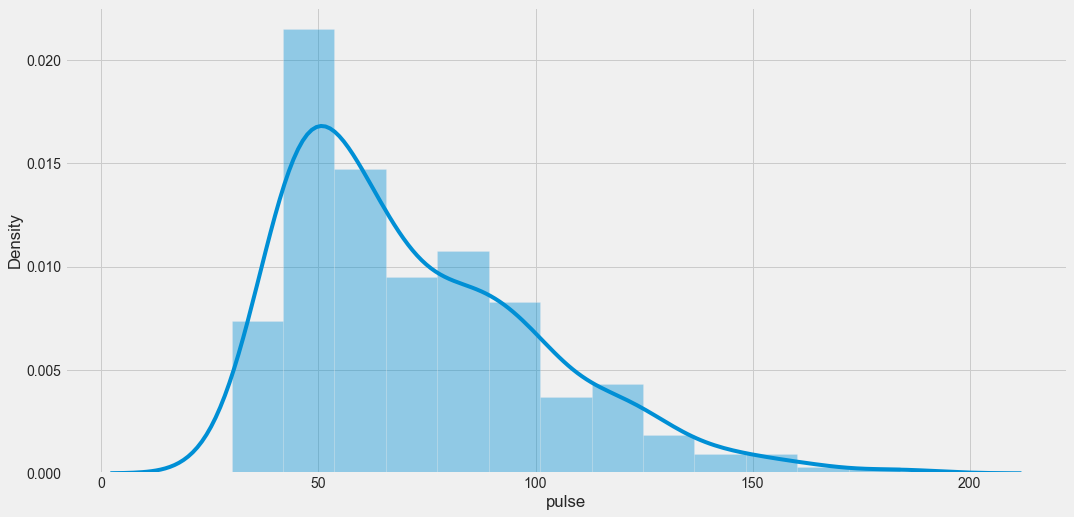

In [22]:
sns.distplot(df['pulse'])

In [23]:
df['pulse'].describe()

count    275.000000
mean      72.000000
std       28.646219
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64

In [24]:
# Filling null values with mean of the numerical column
df['pulse'] = df['pulse'].fillna(df['pulse'].mean())
df['respiratory_rate'] = df['respiratory_rate'].fillna(df['respiratory_rate'].mean())
df['packed_cell_volume'] = df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean())
df['total_protein'] = df['total_protein'].fillna(df['total_protein'].mean())

In [25]:
#drop
df.drop(['nasogastric_tube'],axis=1,inplace=True)
df.drop(['nasogastric_reflux'],axis=1,inplace=True)
df.drop(['nasogastric_reflux_ph'],axis=1,inplace=True)
df.drop(['rectal_exam_feces'],axis=1,inplace=True)
df.drop(['abdomen'],axis=1,inplace=True)
df.drop(['abdomo_protein'],axis=1,inplace=True)
df.drop(['abdomo_appearance'],axis=1,inplace=True)


In [26]:
df['temp_of_extremities'].value_counts()

cool      108
normal     78
warm       30
cold       27
Name: temp_of_extremities, dtype: int64

In [27]:
df['peripheral_pulse'].value_counts()

normal       114
reduced      103
absent         8
increased      5
Name: peripheral_pulse, dtype: int64

In [28]:
df['mucous_membrane'].value_counts()

normal_pink      79
pale_pink        57
pale_cyanotic    41
bright_pink      30
bright_red       25
dark_cyanotic    20
Name: mucous_membrane, dtype: int64

In [29]:
df['capillary_refill_time'].value_counts()

less_3_sec    187
more_3_sec     78
3               2
Name: capillary_refill_time, dtype: int64

In [30]:
df['pain'].value_counts()

mild_pain       67
depressed       59
extreme_pain    42
severe_pain     38
alert           38
Name: pain, dtype: int64

In [31]:
df['peristalsis'].value_counts()

hypomotile     127
absent          73
hypermotile     39
normal          16
Name: peristalsis, dtype: int64

In [32]:
df['abdominal_distention'].value_counts()

none        75
slight      65
moderate    65
severe      38
Name: abdominal_distention, dtype: int64

In [33]:
#fillna 
df['temp_of_extremities'] = df['temp_of_extremities'].fillna('cold')
df['peripheral_pulse'] = df['peripheral_pulse'].fillna('increased')
df['mucous_membrane'] = df['mucous_membrane'].fillna('dark_cyanotic')
df['capillary_refill_time'] = df['capillary_refill_time'].fillna('3')
df['pain'] = df['pain'].fillna('alert')
df['peristalsis'] = df['peristalsis'].fillna('normal')
df['abdominal_distention'] = df['abdominal_distention'].fillna('severe')

In [34]:
df.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [35]:
## traget colums 'Outcome'
df['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [36]:
# Euthanized is also a died state 
df['outcome'].replace(to_replace='euthanized',value='died',inplace=True)

In [37]:
#Now it correct
df['outcome'].value_counts()

lived    178
died     121
Name: outcome, dtype: int64

In [38]:
#--
df.head(10)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.500000,66.0,28.000000,cool,reduced,dark_cyanotic,more_3_sec,extreme_pain,absent,severe,45.000000,8.400000,died,no,11300,0,0,no
1,yes,adult,39.200000,88.0,20.000000,cold,increased,pale_cyanotic,less_3_sec,mild_pain,absent,slight,50.000000,85.000000,died,no,2208,0,0,no
2,no,adult,38.300000,40.0,24.000000,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,33.000000,6.700000,lived,no,0,0,0,yes
3,yes,young,39.100000,164.0,84.000000,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,48.000000,7.200000,died,yes,2208,0,0,yes
4,no,adult,37.300000,104.0,35.000000,cold,increased,dark_cyanotic,more_3_sec,alert,normal,severe,74.000000,7.400000,died,no,4300,0,0,no
5,no,adult,38.168619,72.0,30.460581,warm,normal,pale_pink,less_3_sec,depressed,hypomotile,slight,46.307407,24.274436,lived,no,0,0,0,no
6,yes,adult,37.900000,48.0,16.000000,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,37.000000,7.000000,lived,yes,3124,0,0,no
7,yes,adult,38.168619,60.0,30.460581,cool,increased,dark_cyanotic,less_3_sec,alert,absent,slight,44.000000,8.300000,died,yes,2208,0,0,no
8,no,adult,38.168619,80.0,36.000000,cool,absent,pale_pink,less_3_sec,severe_pain,absent,severe,38.000000,6.200000,died,yes,3205,0,0,no
9,no,young,38.300000,90.0,30.460581,normal,increased,normal_pink,less_3_sec,extreme_pain,hypomotile,none,40.000000,6.200000,lived,no,0,0,0,yes


## EDA ~Plots

<Figure size 864x432 with 0 Axes>

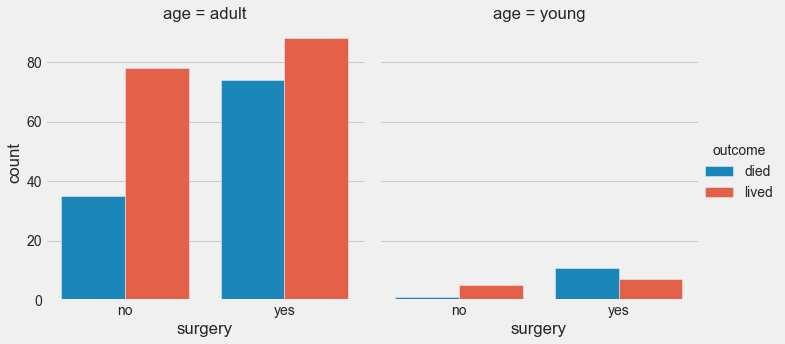

In [39]:
plt.figure(figsize = (12,6))
sns.catplot(x='surgery',data=df,hue='outcome',col='age',kind='count')
plt.show()

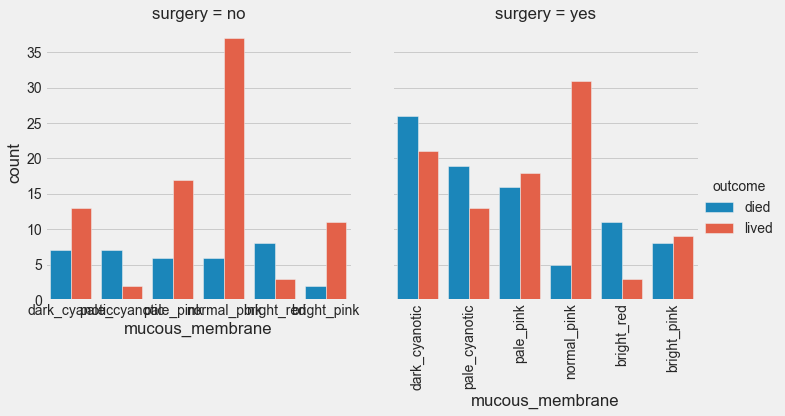

In [41]:
sns.catplot(x='mucous_membrane',data=df,hue='outcome',kind='count',col='surgery')
plt.xticks(rotation=90)
plt.show()

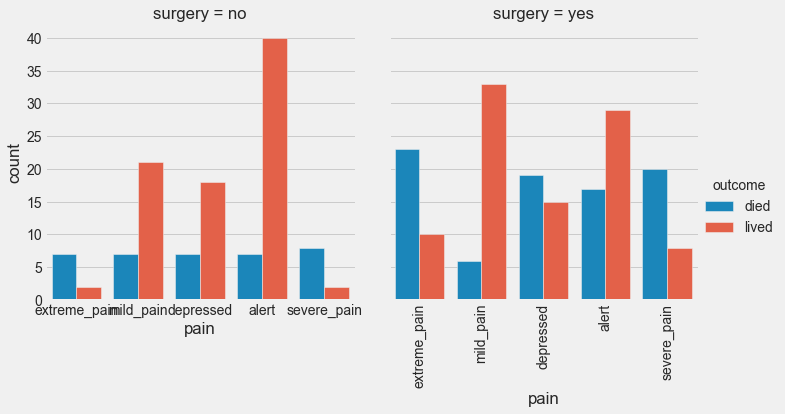

In [42]:
sns.catplot(x='pain',data=df,hue='outcome',kind='count',col='surgery')
plt.xticks(rotation=90)
plt.show()

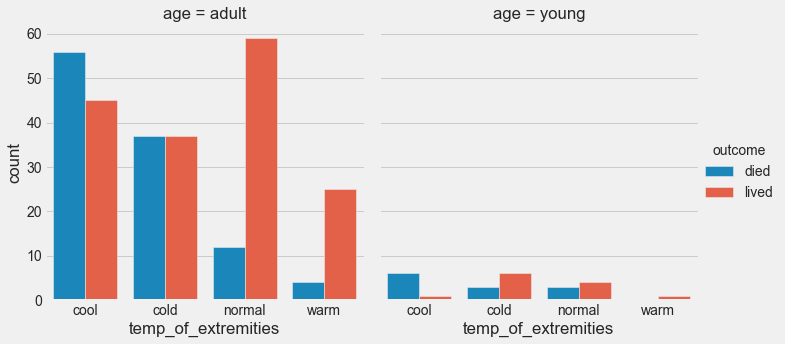

In [43]:
sns.catplot(x='temp_of_extremities',data=df,hue='outcome',kind='count',col='age')

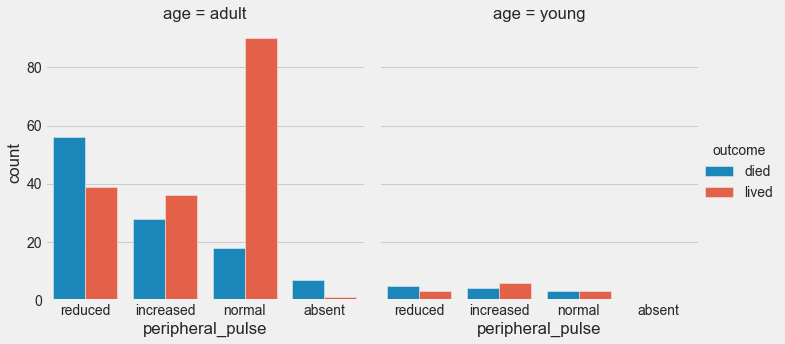

In [44]:
sns.catplot(x='peripheral_pulse',data=df,hue='outcome',kind='count',col='age')
plt.show()

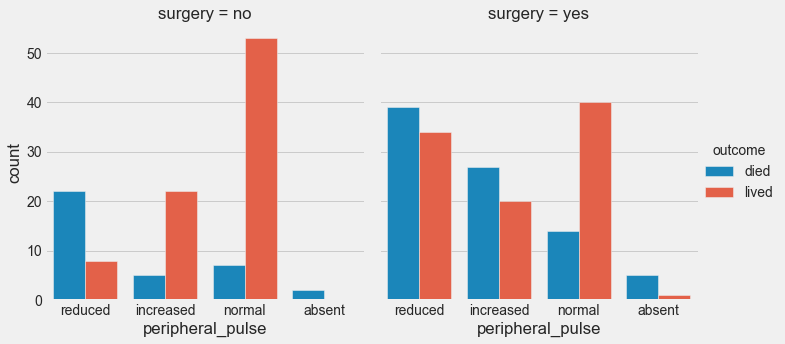

In [45]:
sns.catplot(x='peripheral_pulse',data=df,hue='outcome',kind='count',col='surgery')
plt.show()

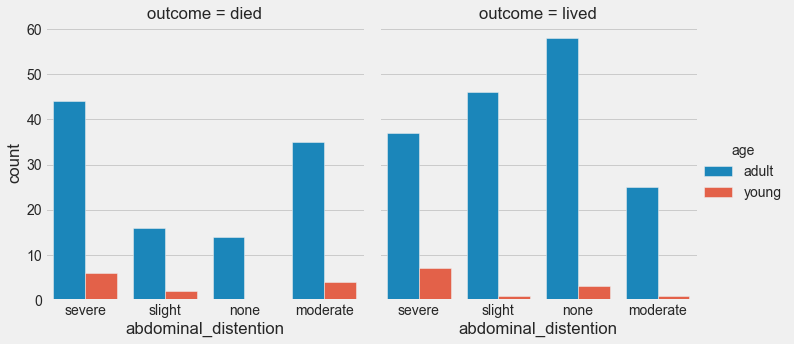

In [46]:
sns.catplot(x='abdominal_distention',data=df,hue='age',col='outcome',kind='count')

<Figure size 1440x1152 with 0 Axes>

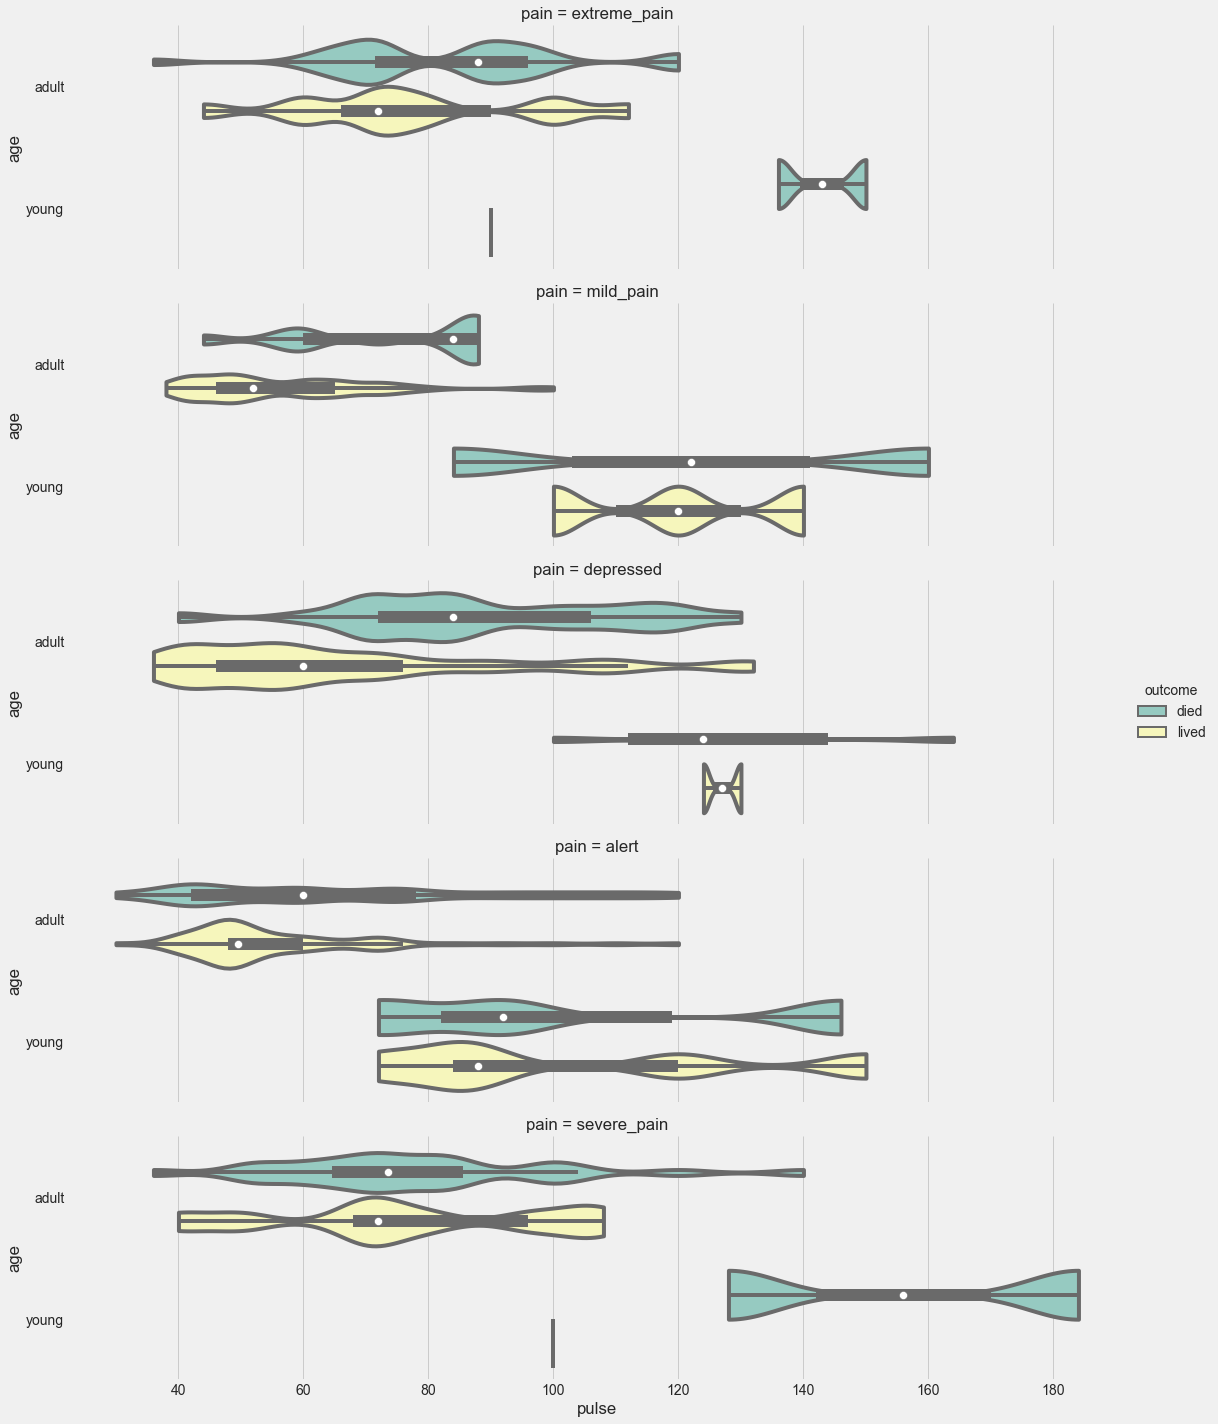

In [47]:
plt.figure(figsize=(20,16))
sns.catplot(x="pulse", y="age",hue="outcome", row="pain",data=df,
                orient="h", height=4, aspect=4, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)

In [48]:
def mix_plot_cat(x,y):
    # 1st plot
    fig, axes = plt.subplots(3, 2, figsize=(25, 20))
    sns.set_style("darkgrid");
    sns.violinplot(ax=axes[0, 0],data=df, x=x, y=y, hue="outcome")
    # 2nd plot
    sns.barplot(ax=axes[0, 1],data=df, x=x, y=y, hue="outcome") 
    # 3rd plot
    sns.boxenplot(ax=axes[1, 0],data=df, x=x, y=y, hue="outcome") 
    # 4th plot
    sns.stripplot(ax=axes[1, 1],data=df, x=x, y=y, hue="outcome") 
    # 5th
    sns.pointplot(ax=axes[2, 0],data=df, x=x, y=y, hue="outcome")  
    # 6th
    sns.boxplot(ax=axes[2, 1],data=df, x=x, y=y, hue="outcome") 

#### Pulse Vs Age

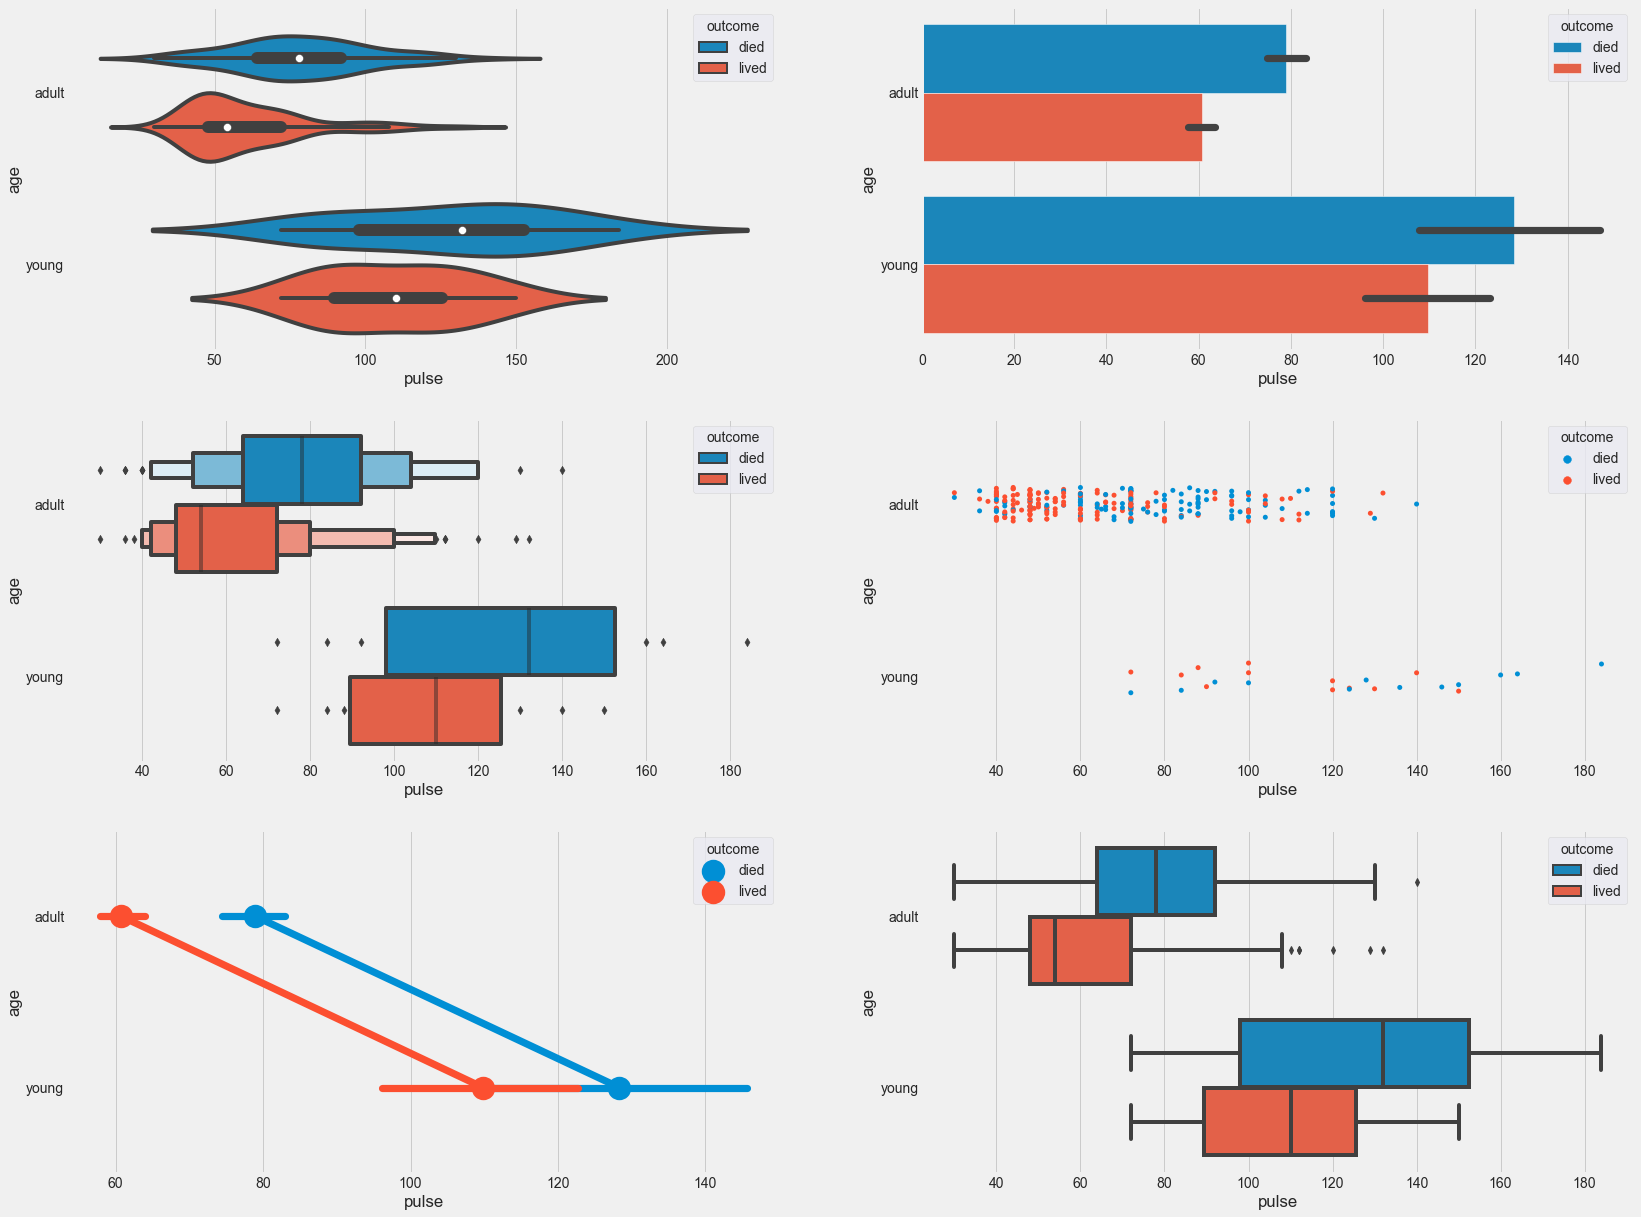

In [49]:
mix_plot_cat('pulse','age')

#### Respiratory_rate Vs Age

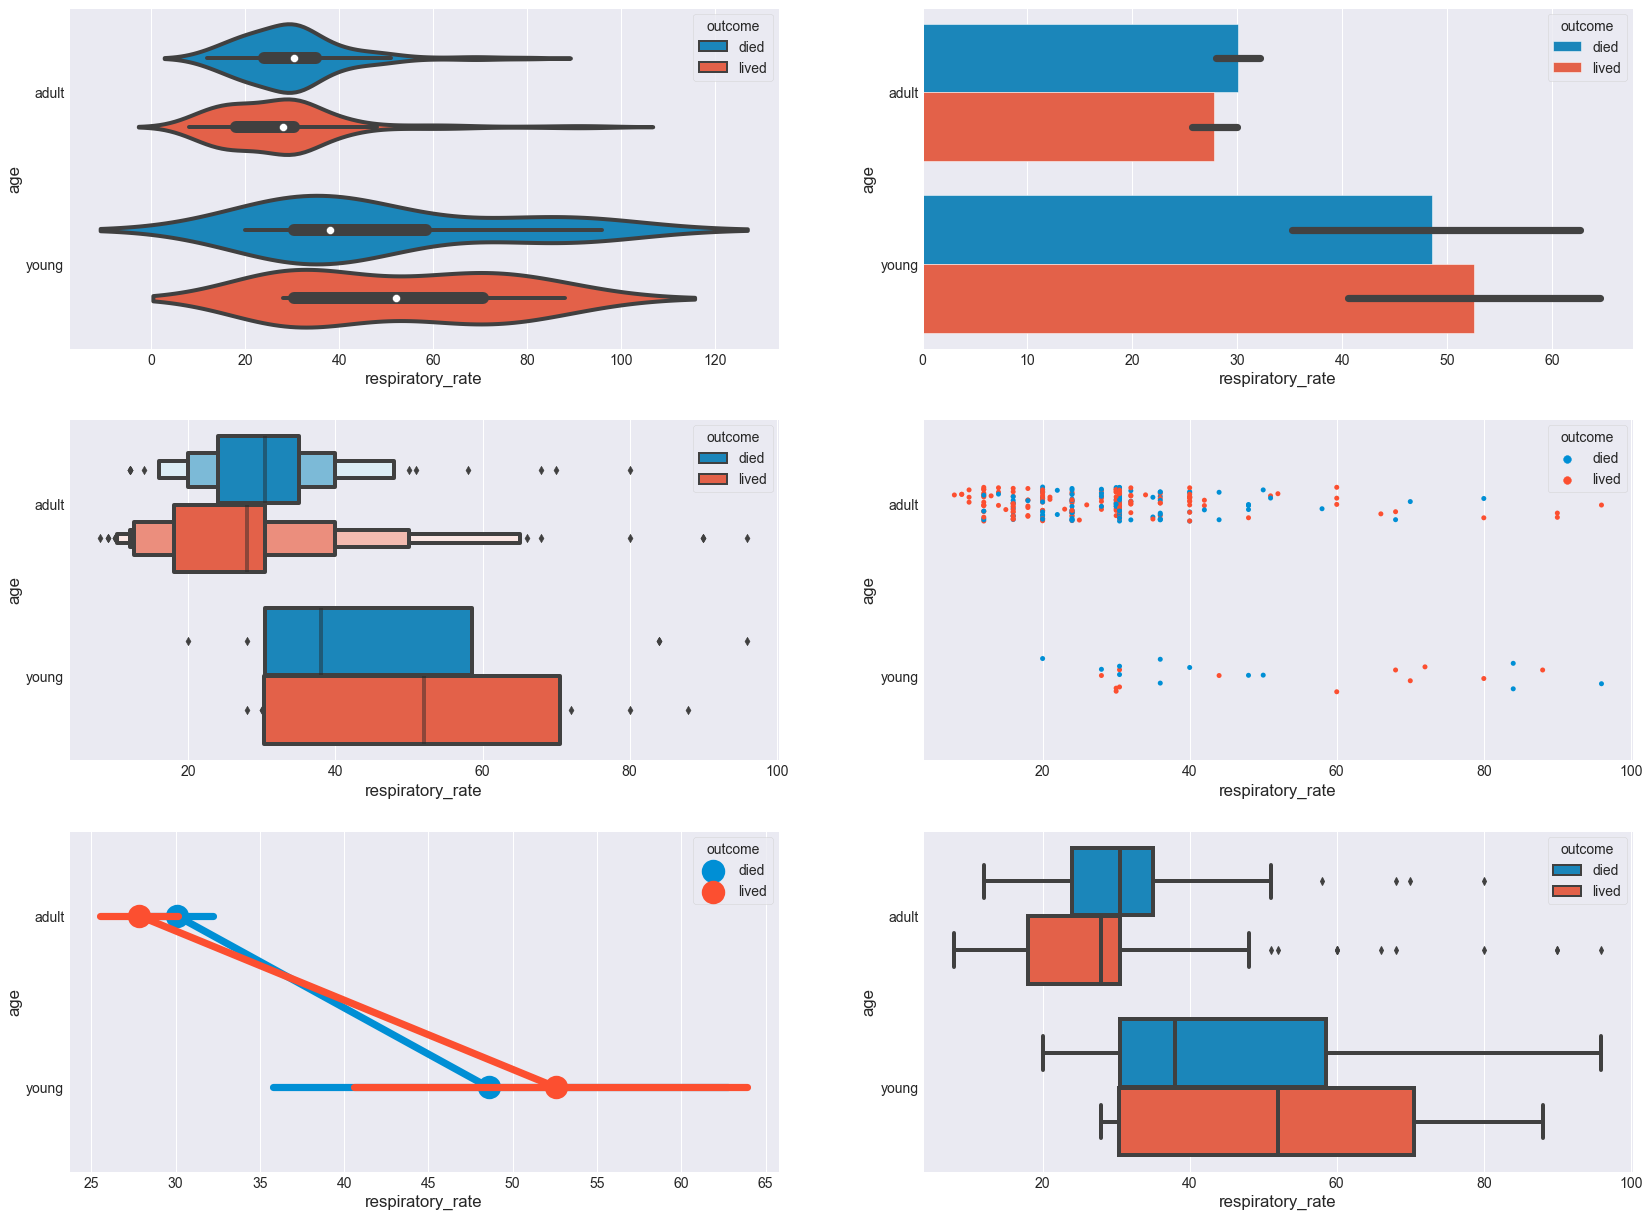

In [50]:
mix_plot_cat('respiratory_rate','age')

#### Total_protein VS Age

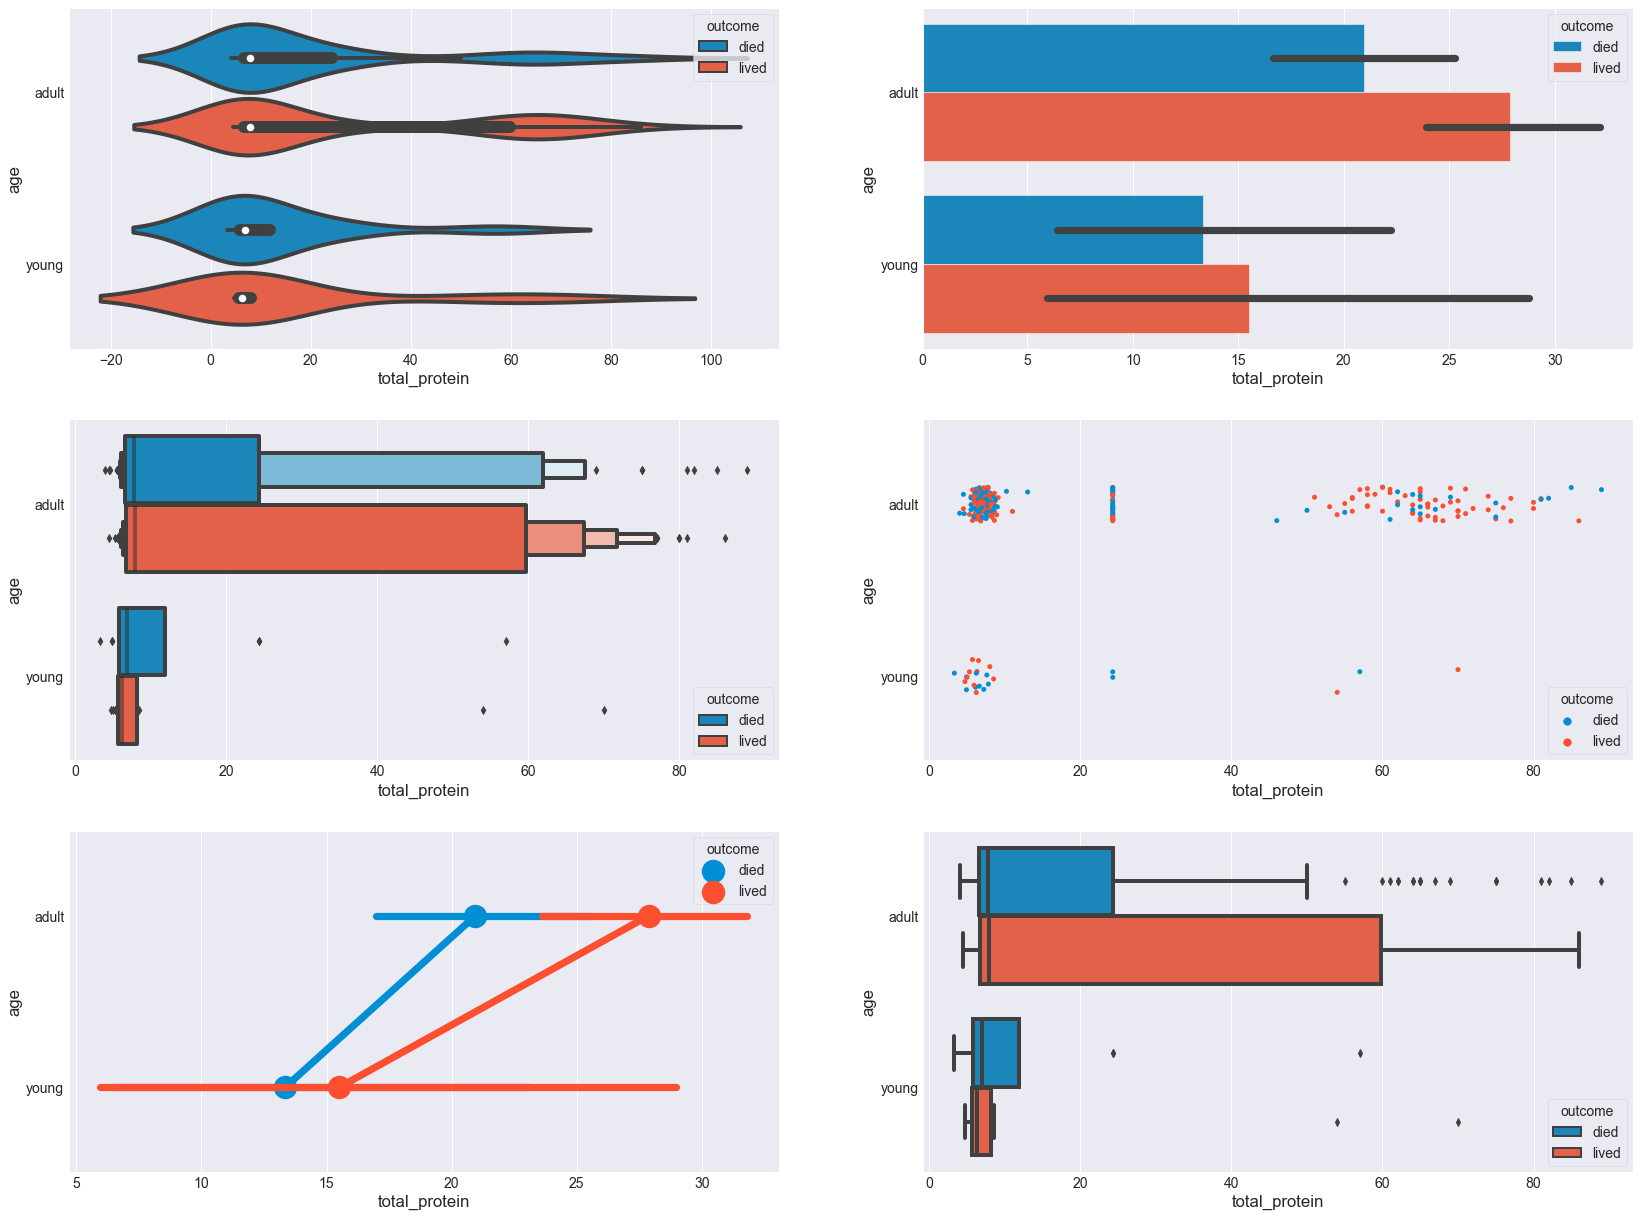

In [51]:
mix_plot_cat('total_protein','age')

#### Pluse vs Pain

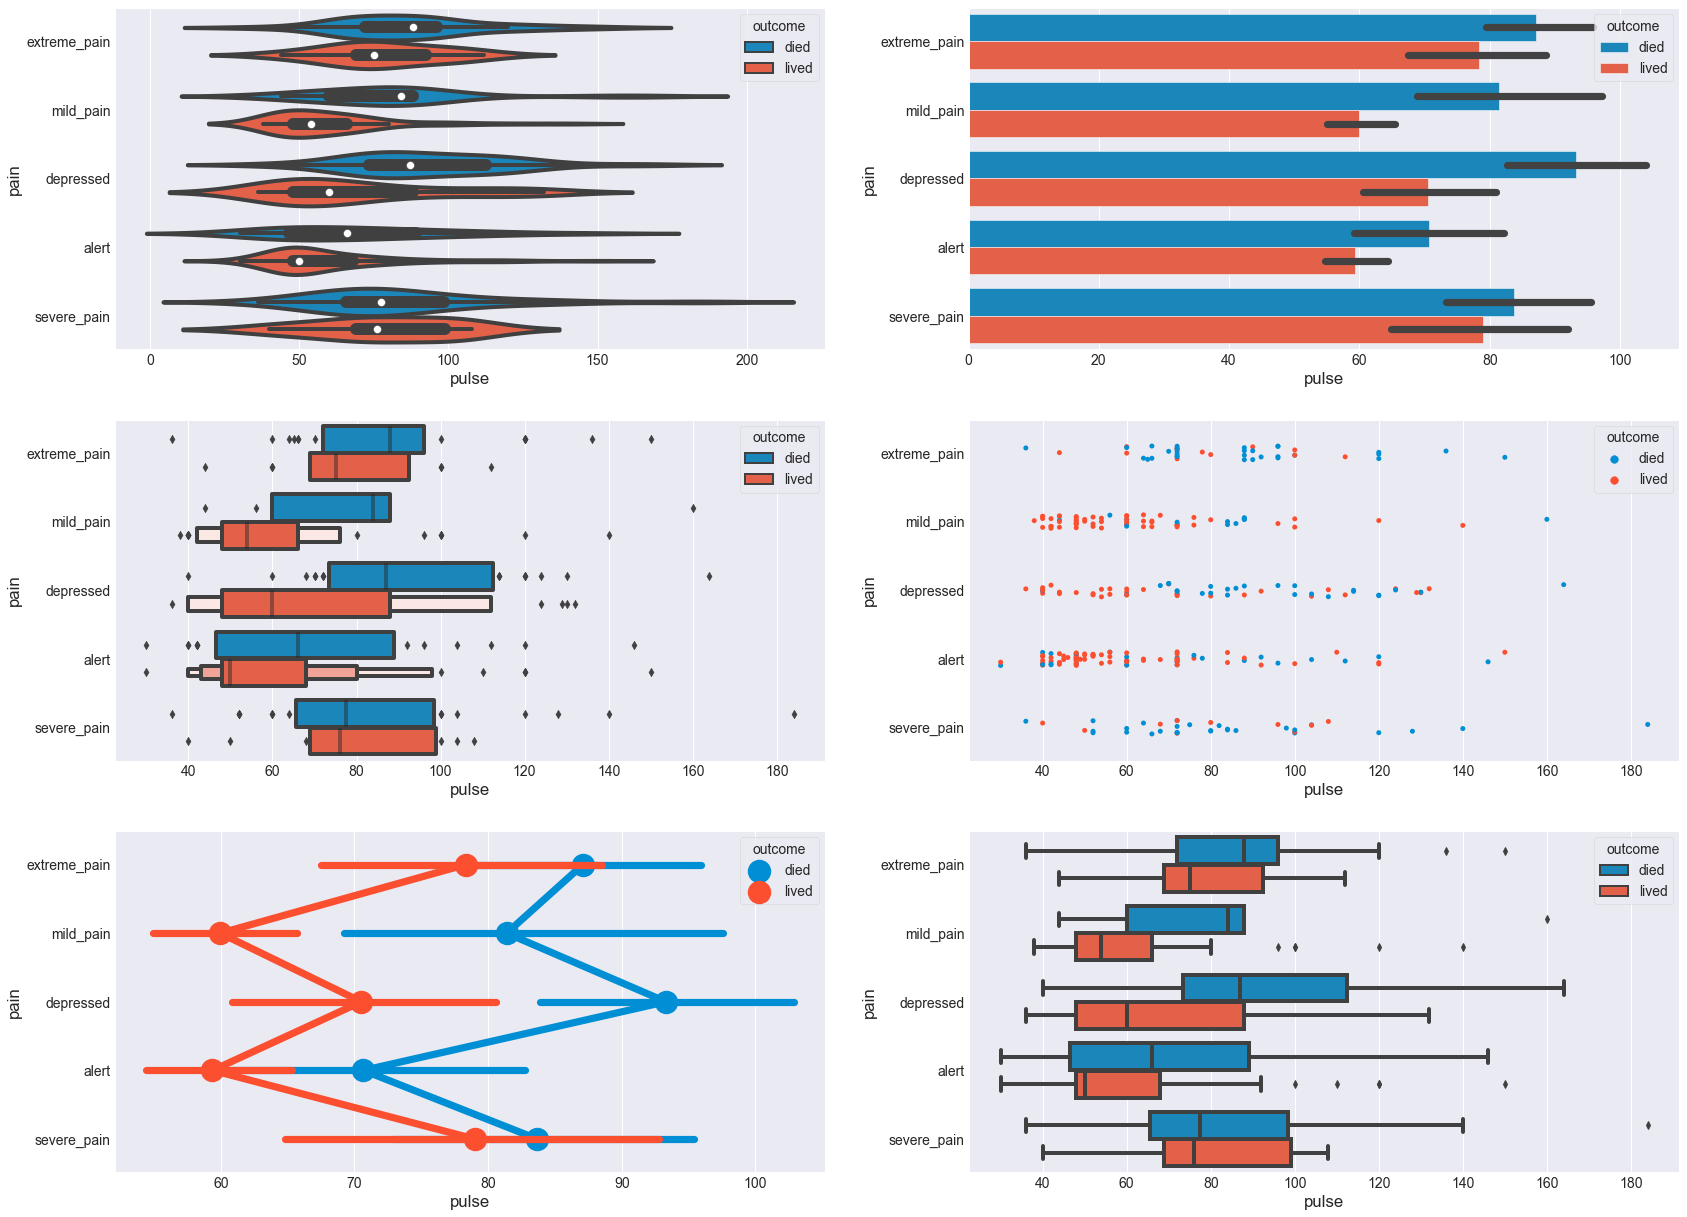

In [52]:
mix_plot_cat('pulse','pain')

<Figure size 1440x1152 with 0 Axes>

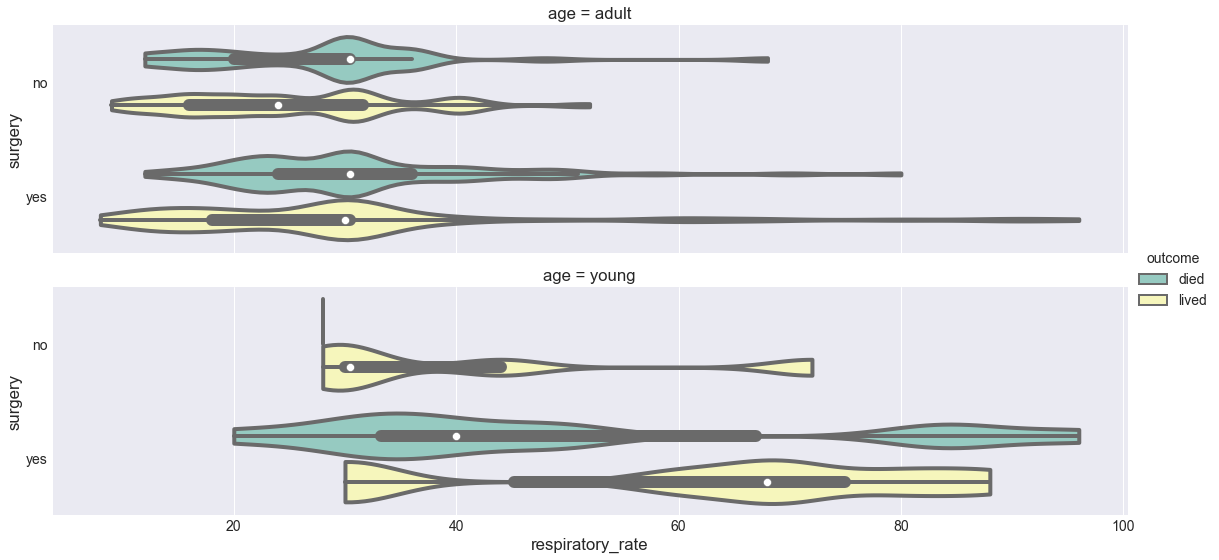

In [53]:
plt.figure(figsize=(20,16))
sns.catplot(x="respiratory_rate", y="surgery",hue="outcome", row="age",data=df,
                orient="h", height=4, aspect=4, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)

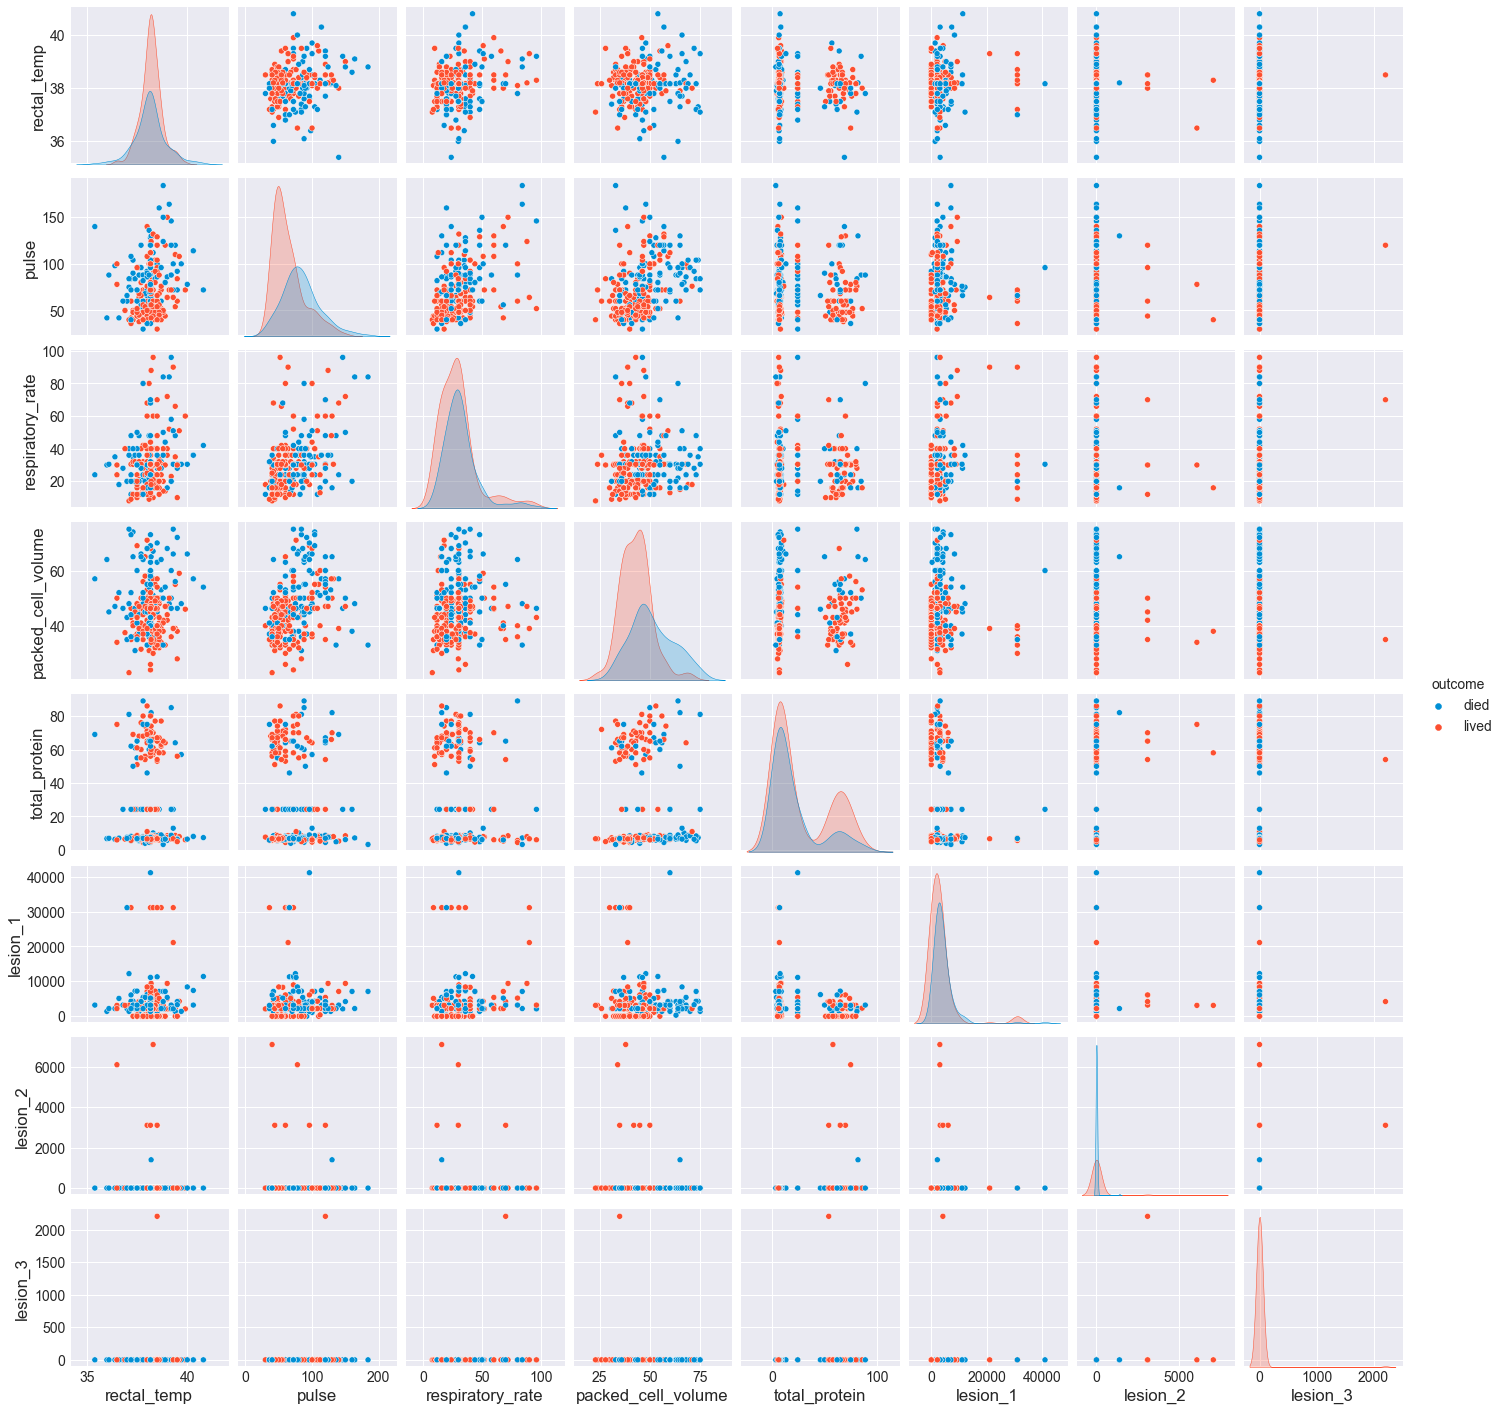

In [54]:
#Pair plot
sns.pairplot(df,hue='outcome')

## Numerical Columns

In [55]:
num_lst=[]
for col in df.columns:
    if df[col].dtypes != 'object':
        num_lst.append(col)

In [56]:
num_lst

['rectal_temp',
 'pulse',
 'respiratory_rate',
 'packed_cell_volume',
 'total_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

In [57]:
df_num = df[['rectal_temp','pulse','respiratory_rate',
             'packed_cell_volume','total_protein','lesion_1','lesion_2','lesion_3']]

In [58]:
df_num.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
0,38.5,66.0,28.0,45.0,8.4,11300,0,0
1,39.2,88.0,20.0,50.0,85.0,2208,0,0
2,38.3,40.0,24.0,33.0,6.7,0,0,0
3,39.1,164.0,84.0,48.0,7.2,2208,0,0
4,37.3,104.0,35.0,74.0,7.4,4300,0,0


In [59]:
def mix_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

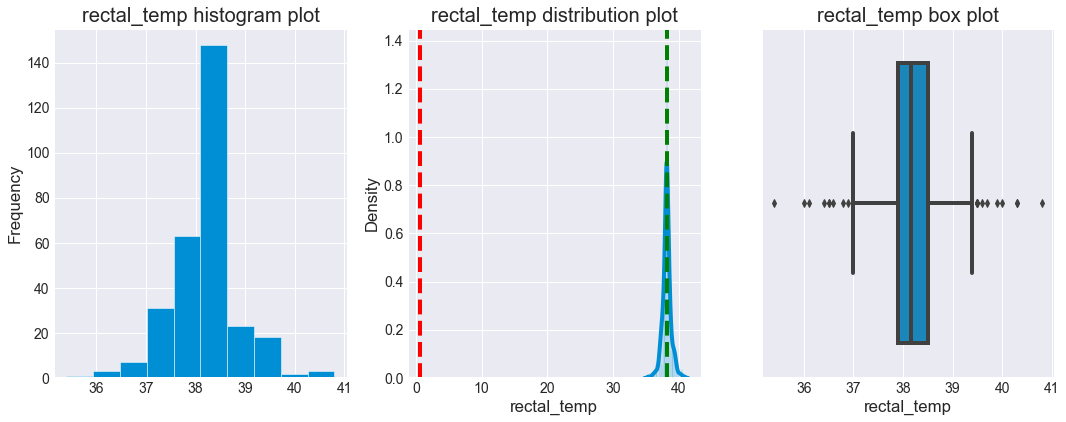

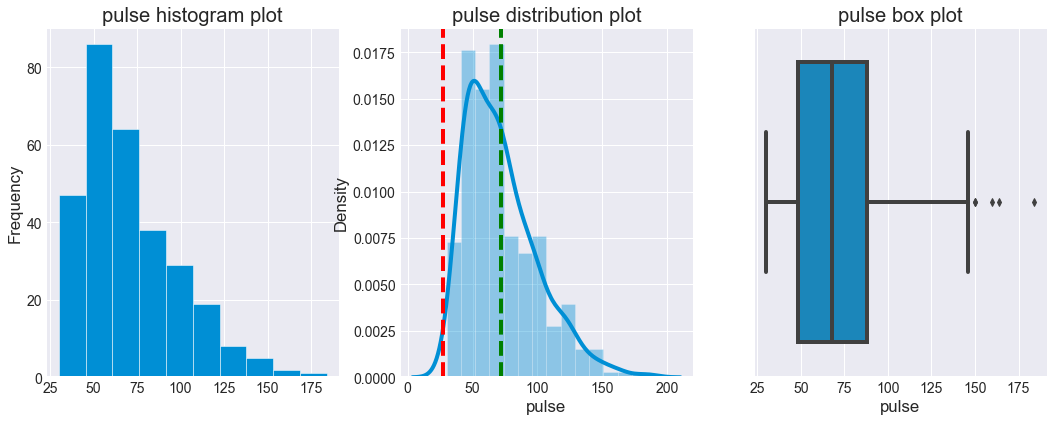

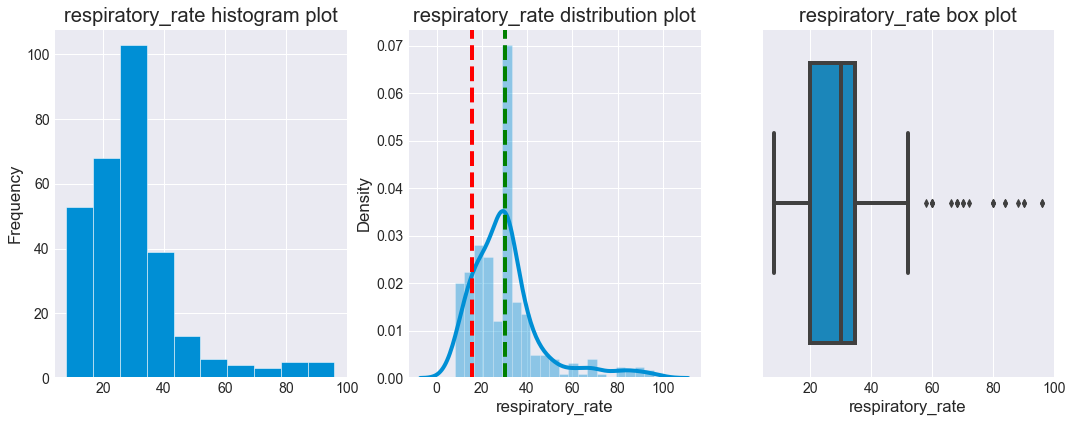

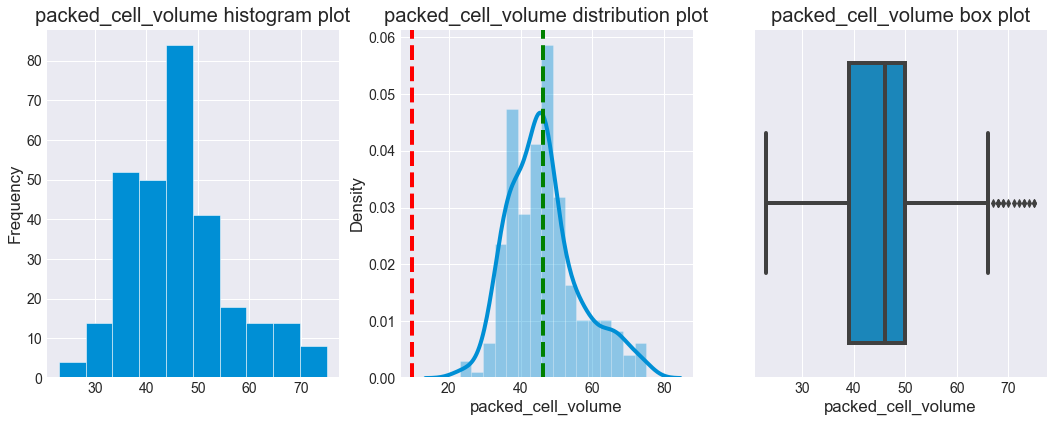

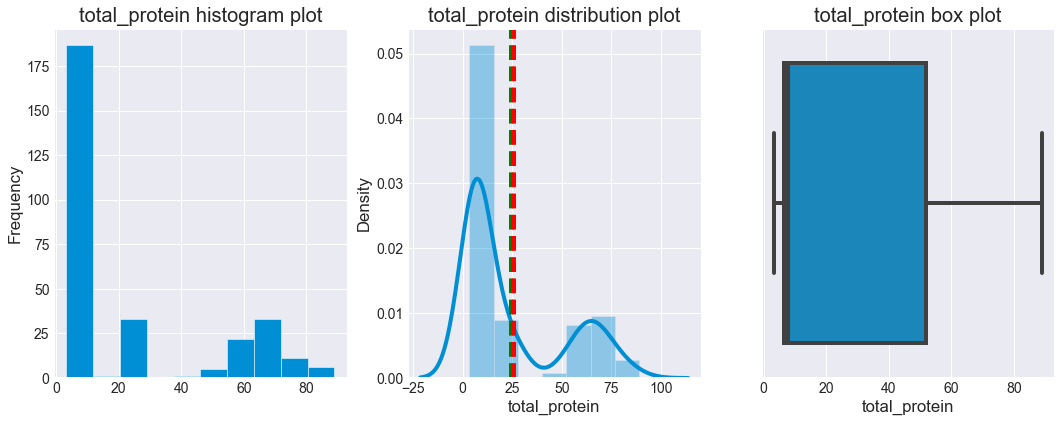

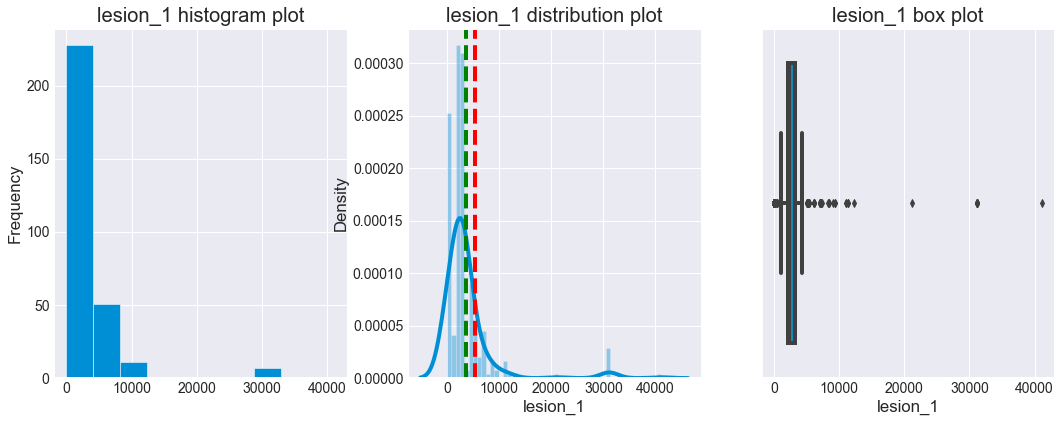

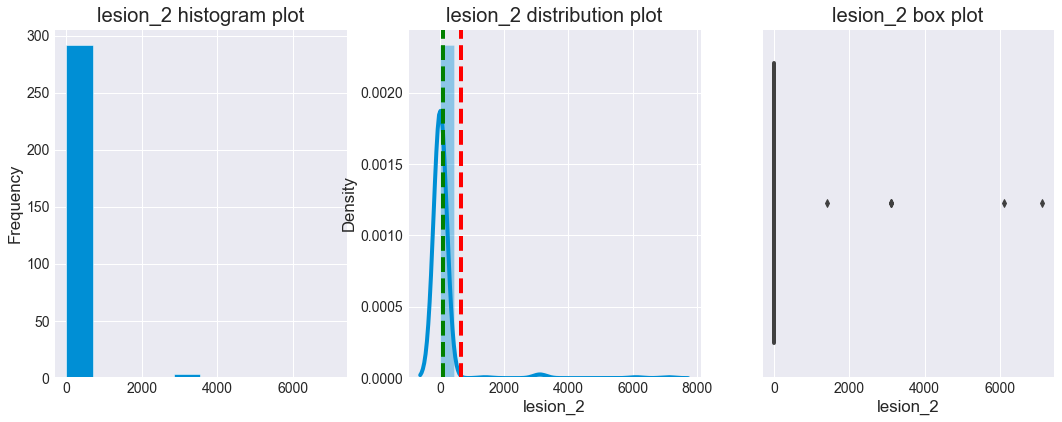

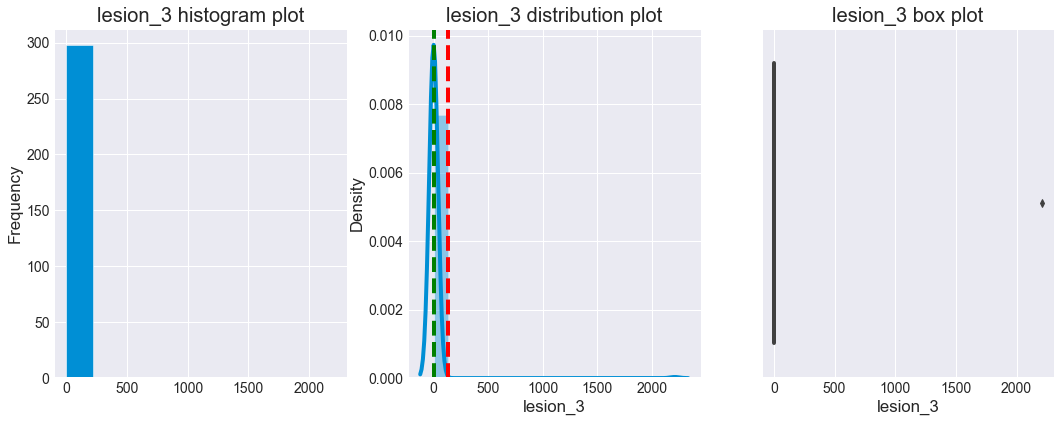

In [60]:
for i in df_num.columns:
    mix_plot(df_num[i])

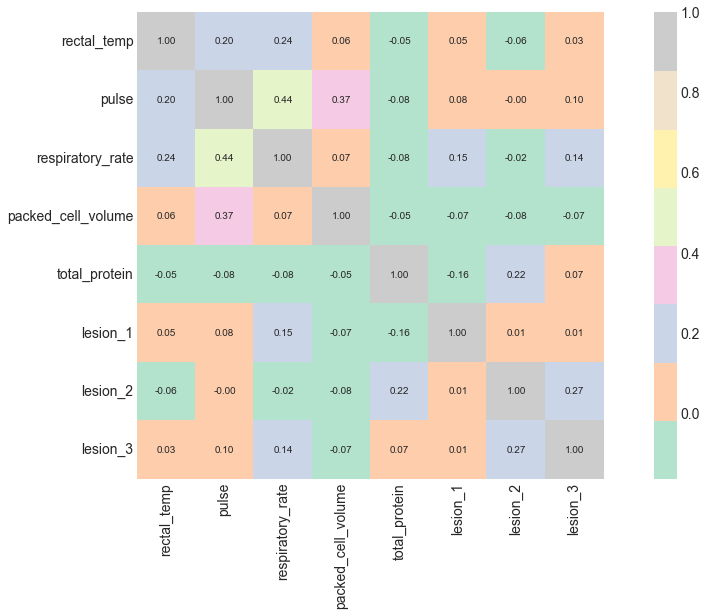

In [61]:
sns.heatmap(df.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Pastel2')
sns.set_style('darkgrid')

### Categorical Colums

In [62]:
cat_lst=[]
for col in df.columns:
    if df[col].dtypes == 'object':
        cat_lst.append(col)
cat_lst.remove('outcome')
cat_lst

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'surgical_lesion',
 'cp_data']

In [63]:
#convert all categorical variables to numeric
df[cat_lst] = df[cat_lst].apply(lambda x: pd.factorize(x)[0])

In [64]:
df['outcome'].value_counts()

lived    178
died     121
Name: outcome, dtype: int64

In [65]:
# target value
df['outcome'] = df['outcome'].map({'lived':0,'died':1}).astype(int)

In [66]:
df['outcome'].value_counts()

0    178
1    121
Name: outcome, dtype: int64

In [67]:
# Independent variable and dependent variable
#Independent 
X = df.loc[:, df.columns != 'outcome']
#dependent
y = df[['outcome']]

In [68]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
print("Shape X_train :",X_train.shape)
print("Shape y_train :",y_train.shape)
print("Shape X_test  :",X_test.shape)
print("Shape y_test  :",y_test.shape)

Shape X_train : (200, 19)
Shape y_train : (200, 1)
Shape X_test  : (99, 19)
Shape y_test  : (99, 1)


In [70]:
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X =Scaler.fit_transform(X)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [72]:
pipe_LR=Pipeline([('scaler1',StandardScaler()),
                 ('LR',LogisticRegression(random_state=2))])
pipe_Ada=Pipeline([('scaler2',StandardScaler()),
                    ('Ada',AdaBoostClassifier(learning_rate=0.1,random_state=2))])
pipe_DT=Pipeline([('scaler3',StandardScaler()),
                  ('DTR',DecisionTreeClassifier())])
pipe_RF=Pipeline([('scaler4',StandardScaler()),
                  ('RFR',RandomForestClassifier())])
pipe_Knn=Pipeline([('scaler5',StandardScaler()),
                   ('Knn',KNeighborsClassifier())])
pipe_Xgb =Pipeline([('scaler5',StandardScaler()),
                   ('Xgboost',XGBClassifier(learning_rate=0.1,random_state=5))])


In [73]:
pipeline=[pipe_LR,pipe_Ada,pipe_DT,pipe_RF,pipe_Knn,pipe_Xgb]
pipe_dict ={0:'Lr',1:'Ada',2:'DT',3:'RF',4:'Knn',5:'Xgb'}

In [74]:
pipe_dict={0:'LogisticRegression',1:'AdaBoostClassifier',2:'DecisionTreeClassifier',3:'RandomForestClassifier'
           ,4:'KNeighborsClassifier',5:'XGBClassifier'}

In [75]:
for pipe in pipeline:
  pipe.fit(X_train,y_train)

[13:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [76]:
for i,models in enumerate(pipeline):
  print("{} Accuracy : {}".format(pipe_dict[i],models.score(X_test,y_test)))

LogisticRegression Accuracy : 0.7373737373737373
AdaBoostClassifier Accuracy : 0.7373737373737373
DecisionTreeClassifier Accuracy : 0.797979797979798
RandomForestClassifier Accuracy : 0.7777777777777778
KNeighborsClassifier Accuracy : 0.7878787878787878
XGBClassifier Accuracy : 0.7575757575757576


In [77]:
model_knn =KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred =model_knn.predict(X_test)

In [78]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
print('Classification_report:\n',metrics.classification_report(y_test,y_pred))
print('Confusion_mat:\n',metrics.confusion_matrix(y_test,y_pred))

Accuracy_Score : 0.7777777777777778
Classification_report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        57
           1       0.74      0.74      0.74        42

    accuracy                           0.78        99
   macro avg       0.77      0.77      0.77        99
weighted avg       0.78      0.78      0.78        99

Confusion_mat:
 [[46 11]
 [11 31]]


In [79]:
error_rate=[]
for i in range(1,30):
  model_knn =KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(X_train,y_train)
  pred_i =model_knn.predict(X_test)
  error_rate.append(np.mean(pred_i) != np.mean(y_test))

Text(0, 0.5, 'Error Rate')

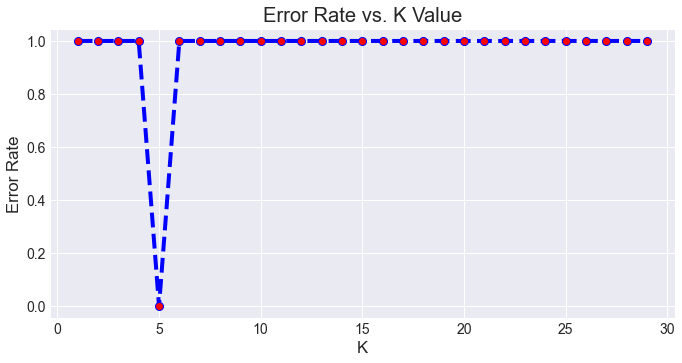

In [80]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
----------------------XXXXXXXXXXXXXXXXXXXXXX-------------------